In [1]:
import sys
sys.path.insert(0, '/usr/local/lib/python3.10/dist-packages')

In [2]:
import torch, detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

<Logger detectron2 (DEBUG)>

In [3]:
import numpy as np
import os, json, cv2, random
from matplotlib import pyplot as plt

In [4]:
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [5]:
def cv2_imshow(im):
  plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB));
  plt.show();

In [6]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("sps_dataset_train", {}, 
                        "/home/ecervera/Desktop/CERN/detectron2/jupyter-demo/annotations_bbox/instances_Subset01.json", 
                        "/home/ecervera/Desktop/CERN/detectron2/jupyter-demo/image_SPS_1720795090")

In [7]:
sps_metadata = MetadataCatalog.get("sps_dataset_train")
sps_dataset = DatasetCatalog.get("sps_dataset_train")

[07/30 09:18:33 d2.data.datasets.coco]: Loaded 302 images in COCO format from /home/ecervera/Desktop/CERN/detectron2/jupyter-demo/annotations_bbox/instances_Subset01.json


In [8]:
cfg = get_cfg()
cfg.merge_from_file("output/config.yml")

In [9]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set a custom testing threshold
predictor = DefaultPredictor(cfg)

[07/30 09:18:34 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output/model_final.pth ...


In [10]:
from detectron2.utils.visualizer import ColorMode

/home/ecervera/.local/lib/python3.10/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


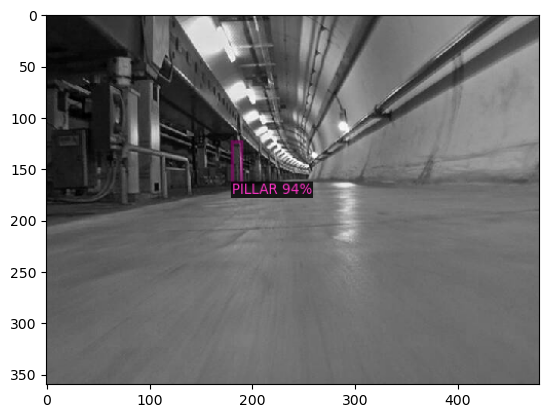

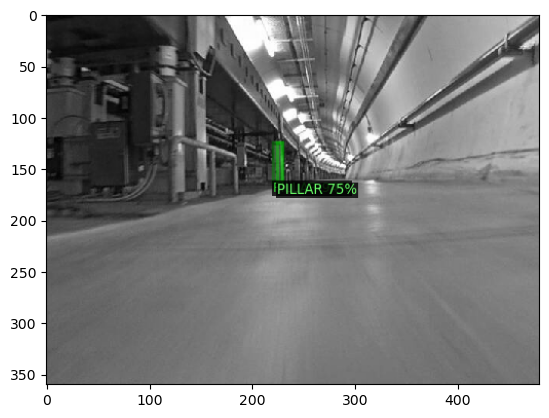

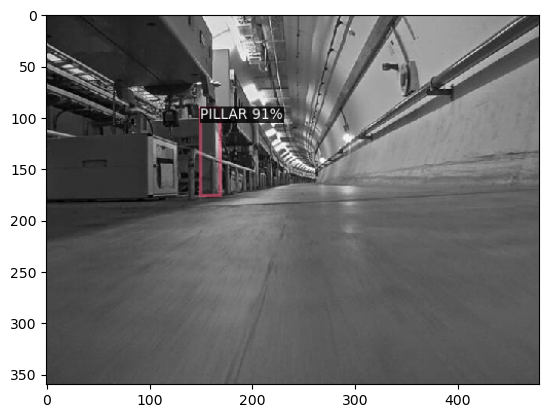

In [11]:
for d in random.sample(sps_dataset[51:], 3):
      im = cv2.imread(d["file_name"])
      outputs = predictor(im)
      v = Visualizer(im[:, :, ::-1],
               	metadata=sps_metadata,
               	scale=0.75,
               	instance_mode=ColorMode.IMAGE_BW
      )
      out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
      cv2_imshow(out.get_image()[:, :, ::-1])